# Gerekli Kütüphaneler

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics

seed = 42
np.random.seed(seed)
random.seed(seed)

# Veri Seti

In [13]:
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=seed)

# Mini Batch K-Means

In [18]:
class MiniBatchKMeans:
    def __init__(self, n_clusters=2, batch_size=100, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.batch_size = batch_size
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        n_samples, n_features = X.shape
        # Ilk merkezler rastgele secilir
        random_idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_idx]

        for i in range(self.max_iters):
            # Mini-batch sec
            minibatch_idx = np.random.choice(n_samples, self.batch_size, replace=False)
            minibatch = X[minibatch_idx]

            # En yakin merkezler bulunur
            distances = np.zeros((minibatch.shape[0], self.n_clusters))
            for i, centroid in enumerate(self.centroids):
                distances[:, i] = np.linalg.norm(minibatch - centroid, axis=1)

            closest_centroids = np.argmin(distances, axis=1)

            # Merkezleri guncelle
            new_centroids = np.copy(self.centroids)
            for c in range(self.n_clusters):
                points_per_centroid = minibatch[closest_centroids == c]
                if points_per_centroid.shape[0] > 0:
                    new_centroids[c] = points_per_centroid.mean(axis=0)

            # Degisim kontrolu
            centroid_shift = np.linalg.norm(self.centroids - new_centroids, axis=None)
            if centroid_shift < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)

        return np.argmin(distances, axis=1)

# Eğitim

In [19]:
mbatch = MiniBatchKMeans(n_clusters=2, batch_size=100, max_iters=100)
mbatch.fit(X)

# Sonuçlar

In [20]:
y_pred = mbatch.predict(X)

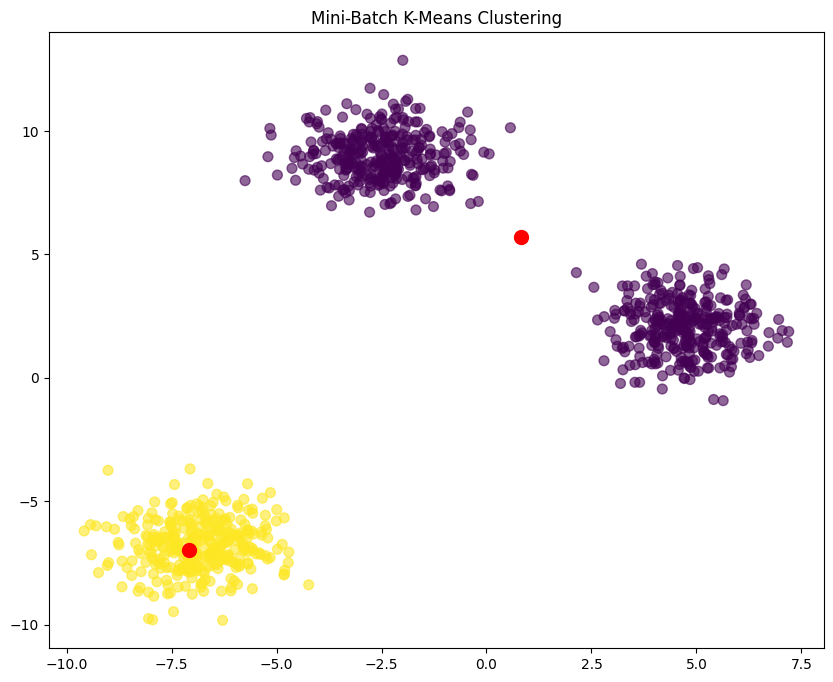

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.6)
plt.scatter(mbatch.centroids[:, 0], mbatch.centroids[:, 1], c='red', s=100, marker='o')
plt.title("Mini-Batch K-Means Clustering")
plt.show()